# 2D slice of a waveguide filled with wire material

In [1]:
import sys
sys.path.insert(0, "../simulations/")
from IPython.display import Image
import meep as mp
import matplotlib.pyplot as plt
import time
import funcs as fu

So, what are we going to simulate? We are going to take an infinitely long waveguide with metal walls, like this one

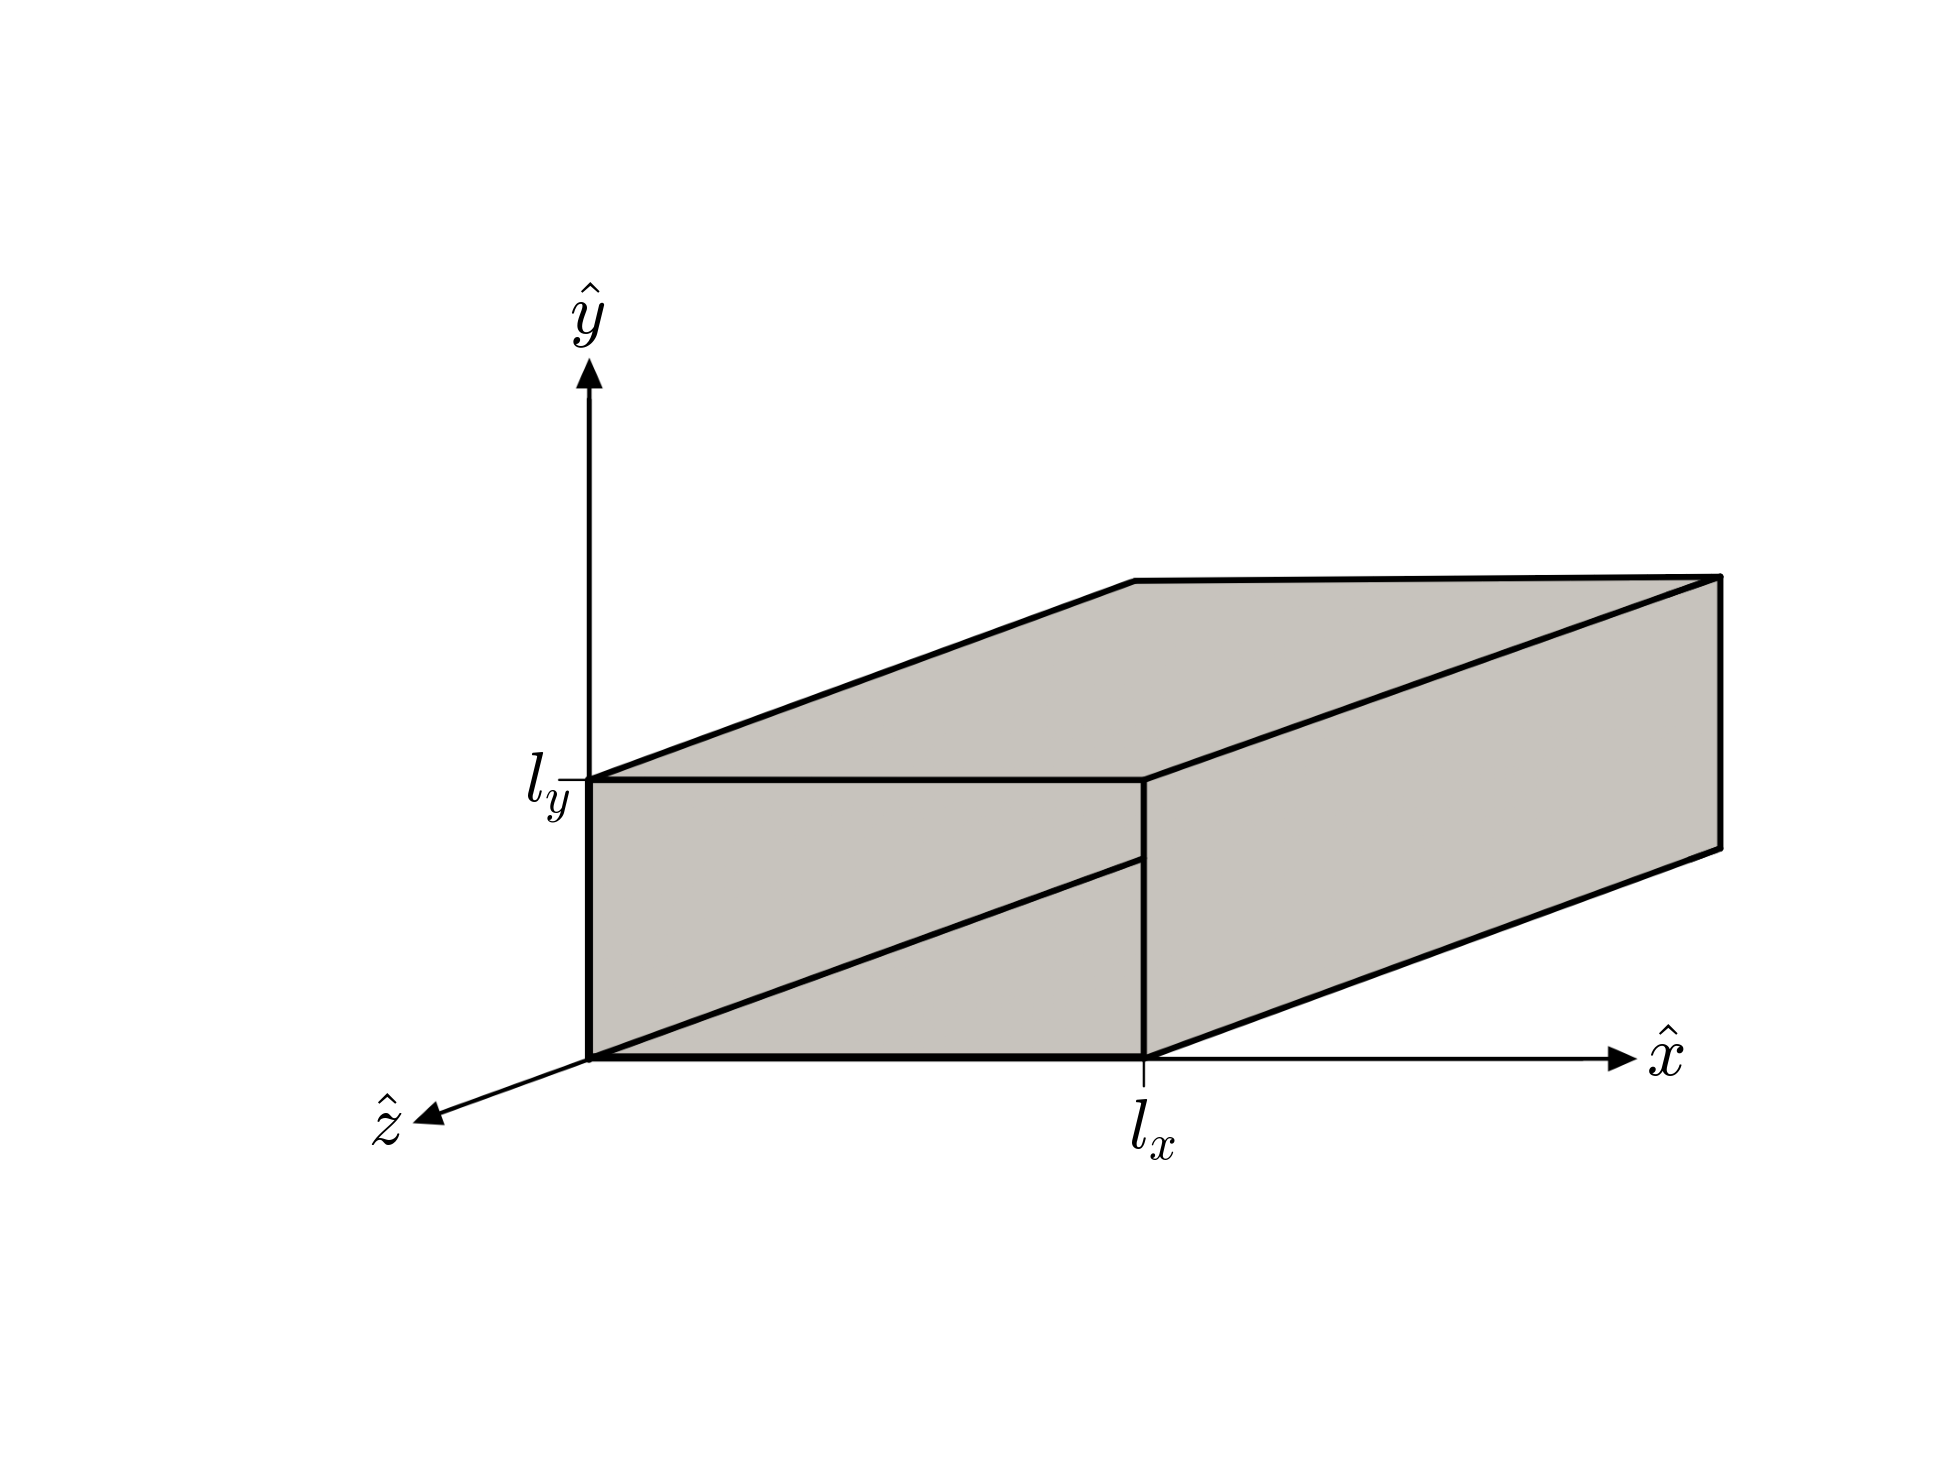

In [2]:
Image(filename="example_images/waveguide.png", width=500) 

and fill it with a wire material like the one in the cell below. The wire material consists of an array of infinitely long parallel metal wires that have radius $r$ and are equally spaced. The distance between the centers of a wire and those of its closest neighbors is $a$, and the walls are placed at
a distance of $a/2$ from the centers of the outermost wires in the grid

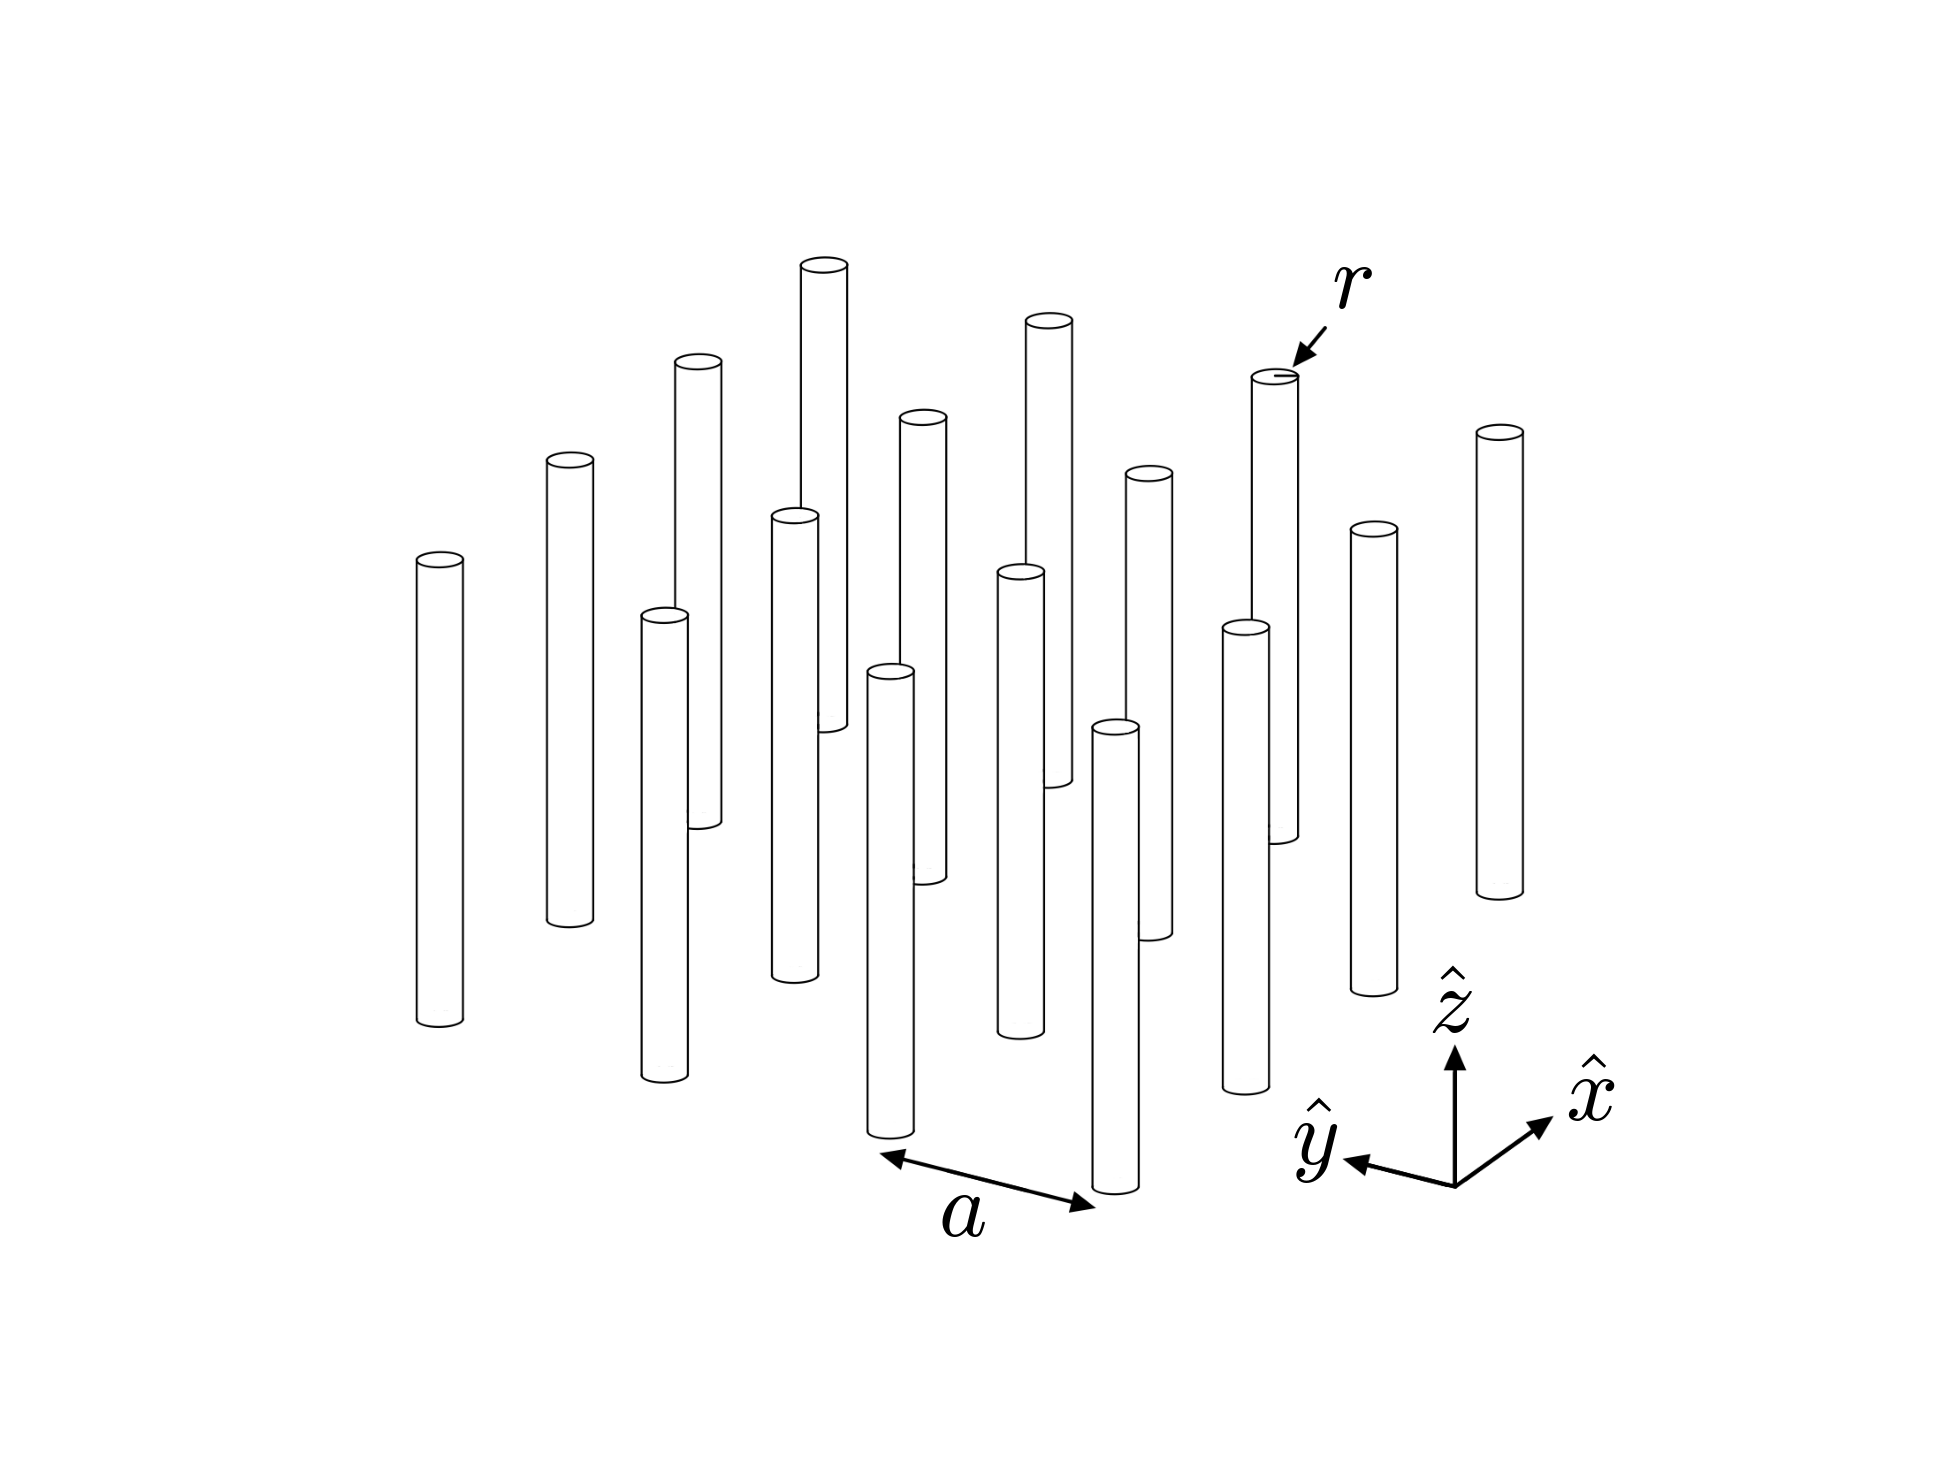

In [3]:
Image(filename="example_images/wire_material.png", width=500) 

What we are going to simulate is a 2D slice of that wire filled waveguide. In the end, it will look something like this

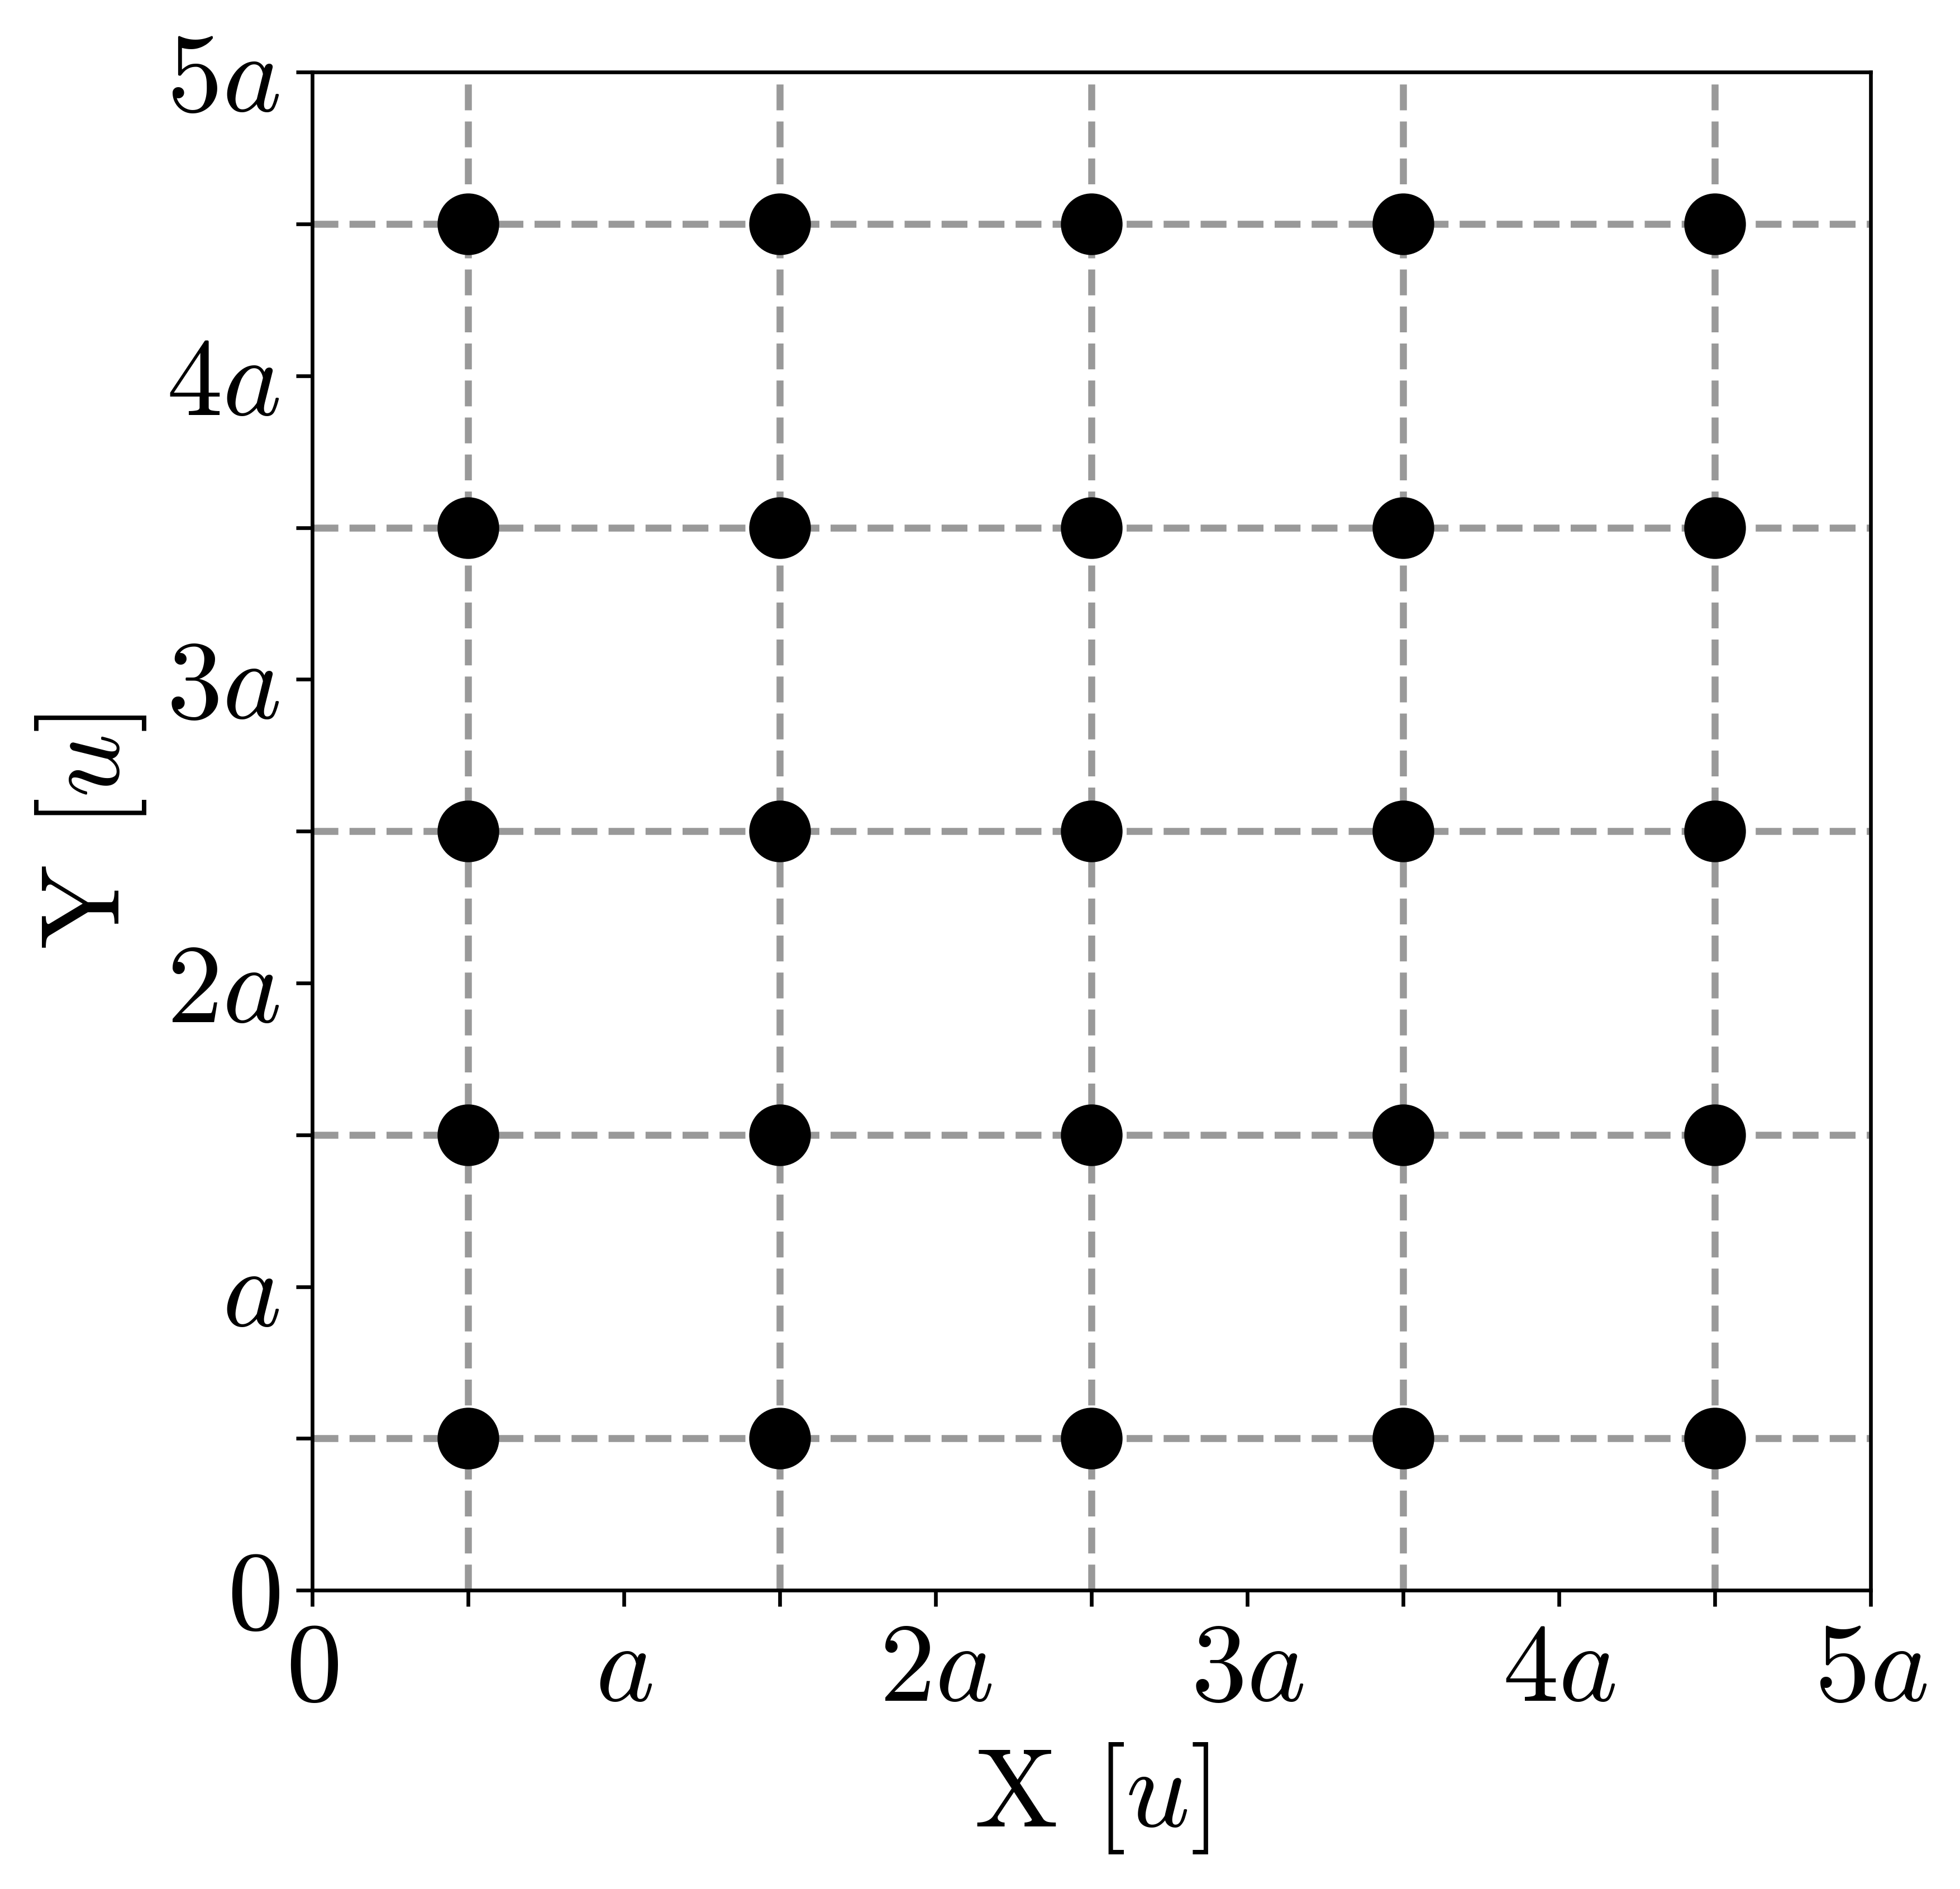

In [4]:
Image(filename="example_images/scheme_ideal.png", width=300) 

The module funcs will do all Meep-related setup for you, all you need to do is to supply the parameters for our simulation, and this you do through a dictionary.

## How to set up the geometry

Let us start by making a square grid of 25 round wires, such as the one in the image above. To do this we start by setting:
- The meep unit distance is $1 \text{ mm}$ ($u$ in the image above).
- The resolution (number of pixels per unit distance).
- The shape of the wires. I chose round wires, but you can also use square.
- The size of the wires. The key wire_size refers to the diameter in the case of round wires or the sides in the case of square ones.
- The wire spacing $a$. The distance between the centers of a wire and those of its closest neighbors.

In [5]:
P = {
    "meep_unit": 1e-3,
    "resolution": 8,
    "wire_shape": "round", # you can also use "square"
    "wire_size": 2.,
    "wire_spacing_x": 10.,
    "wire_spacing_y": 10.,
    "wire_number_x": 5,
    "wire_number_y": 5,
    }

You can use different materials for the wires. For example, can define your own medium or use the function `fu.get_simple_metall(**P)` to emulate a lossy material. We will use a perfectly conducting metal, to do this we set

In [6]:
P["wire_material"] = mp.metal

You can also use different types of walls for your waveguide:
- A perfectly conducting metal (PEC). For this, we use Meep's automatic boundary condition.
- No walls at all. For this, you need to choose either an absorbing or perfectly matched layer as your boundary condition. 
- Walls made out of some general material, for example, you can use lossy walls.

For the second or third option, you set the keys:
- "boundary_condition" to "open"
- "walls_material" to mp.air for no walls or define another medium like in the case of the material for the wires.
- "walls_width" to 0 if you want no walls, or set it to some width.
- "absorber_width" in both cases to some nonzero number. Check out the Meep webpage.
- "absorber_layers" to a list, either `[mp.Absorber(P["absorber_width"])]` or `[mp.pml(P["absorber_width"])]`

Here we will use the first option. To do this we set:

In [7]:
P["boundary_condition"] = "PEC"
P["walls_width"] = 0.
P["absorber_width"] = 0.
P["walls_to_wires_x"] = 0.5*P["wire_spacing_x"]
P["walls_to_wires_y"] = 0.5*P["wire_spacing_y"]
P["cell_size"] = fu.cell_size_2D_wire_grid(**P)

You can introduce different types of defects in the wire material. In this notebook, we will use an ideal grid, so we set 

In [8]:
P["get_defects"] = False
P["defects"] = fu.get_defects(**P)

When `P["get_defects"]` is set to False, `get_defects()` will return a zero-filled array. 

In [9]:
display(P["defects"])

array([[[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]]])

## How to set up the source and mode solver

I've mostly used Harminv to find the resonant modes, to use that you set

In [10]:
P["solver"]= "TD_harminv"

In order to extract the resonant TM-modes, we need to excite the electric field in the z-direction, we do this by placing a current source inside the cell. If you use TD_harminv as you solver the source will be gaussian like. The func module will do this automatically for you (placed symmetrically and covering the entire cavity) all you need to do is specify the frequency and its range. There are some analytical predictions that can be used as guidelines.

In [11]:
P["source_frequency"] = 0.9*fu.TM_nm0_WM_2D(**P)
P["source_frequency_width"] = 1.9*((fu.TM_nm0_WM_2D(1, 2, **P)-fu.TM_nm0_WM_2D(**P)))

In [12]:
P["until_after_sources"] = 200

## How to show a plot of the geometry

You can now check that everything looks up to code by running the cell below. The blue dot indicates where Harminv will sample. That point is chosen automatically for the ideal and tuned grid. But if you add defects you may need to change it. 

-----------
Initializing structure...
Halving computational cell along direction x
Halving computational cell along direction y
time for choose_chunkdivision = 0.000849009 s
Working in 2D dimensions.
Computational cell is 50 x 50 x 0 with resolution 8
     cylinder, center = (-20,-20,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     cylinder, center = (-20,-10,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     cylinder, center = (-20,0,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     cylinder, center = (-20,10,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     cylinder, center = (-20,20,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon d

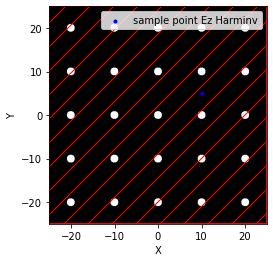

In [13]:
fu.get_plot_geometry_and_harminv_sampling(**P)

## How to set up simulation output

First, we need a directory to store the simulation output in.

In [14]:
P["directory"] = "out"

Second, we need to choose what type of output we want from the simulation. Some of these require that you use complex fields for the simulation but the funcs module will take care of this 
automatically. I briefly describe the output options below, but you should take a look at the corresponding functions in the module and find out exactly what they do, and under which condition they will be called.

There are four functions that will be called only if Harminv finds a single resonant mode:
- "get_max_field_slice": Saves an image of Ez at its maximum amplitude. Will choose the max amplitude from 10 slices taken during half a period of the resonant mode.
- "get_field_slices": Saves 10 image slices of the Ez, Hx, and Hy field taken during half a period of the resonant mode.
- "get_phase_plot": Saves images of the Ez, Hx, and Hy phases.
- "get_fields": I've used this to organize various types of output, right now it will output:
  - Images of the rephased amplitude of Ez, Hx, and Hy.
  - A dictionary called sim_output containing a variety of output:
      - Overlap for Ez, Hx, and Hy. It will compute both the overlap from the fields at a single time step and an overlap calculated using the rephased fields.
      - Energy stored in Ez and H.
      - A number measuring how asymmetric the fields are.
      
(If Harminv doesn't find any resonant modes at all, it will call "get_max_field_slice" anyways.)

Lastly, there are two other functions:
- "get_error_estimates": This will save some output for the Ez field. It will for example calculate the mean and standard deviation of Ez and its phase from a small part of the cell.
- "get_steady_state_fields": Similar to get_fields but uses DFT to find the steady-state fields so it works for more than one resonant mode. Its runtime is determined by a stop condition. It will save the runtime overlap seperatly from the sim_output dict. Work in progress.

In [15]:
P["get_max_field_slice"] = True
P["get_field_slices"] = False
P["get_phase_plot"] = False
P["get_fields"] = True
P["get_error_estimates"] = False

P["get_steady_state_fields"] = True
P["steady_state_fields_sample_periods_min"] = 2
P["steady_state_fields_sample_periods_max"] = 10
P["steady_state_fields_overlap_stop_condition"] = 1e-4

There are some image options that you can control from the script:
 - "plot_sampling": Shows in the mock_up plot where fields and harminv sample
 - "plot_accentuated_wires": Colors the wires with gray in many fields images.
  - "plot_subcell": For example, if your geometry is mirror symmetric with respect to the X and Y axis, you can use this. It will only use one section of the field for calculations and only plot a subregion of your fields.
  
### **Important**
- The funcs module will add symmetries to the simulation. I have only added symmetries for a couple of scenarios, and I have only used square grids. So you should always check this yourself and/or modify the function `fu.get_symmetries()` accordingly.
- Also, plot_subcell does not yet work for the overlap of the steady state fields. Make sure not to use them at the same time.


In [16]:
P["plot_sampling"] = True
P["plot_accentuated_wires"] = False
P["plot_subcell"] = False

if P["get_steady_state_fields"] is True:
    P["plot_subcell"] = False

That's it, now you can run the simulation and save its output. The output will be saved in P["directory"] so make sure you have it.

## How to run the simulation and how output is stored

In [17]:
start = time.time()

freq_set, mode_set, fields_set, sim = fu.get_freqs_for_2D_grid(**P)
fu.save_output(freq_set, mode_set, fields_set, **P)

end = time.time()
elapsed_time = end - start
print("elapsed time =", (end-start)/60., "minutes")

-----------
Initializing structure...
Halving computational cell along direction x
Halving computational cell along direction y
time for choose_chunkdivision = 0.00173807 s
Working in 2D dimensions.
Computational cell is 50 x 50 x 0 with resolution 8
     cylinder, center = (-20,-20,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     cylinder, center = (-20,-10,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     cylinder, center = (-20,0,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     cylinder, center = (-20,10,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     cylinder, center = (-20,20,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon di

FloatProgress(value=0.0, description='0% done ', max=1749.8946533203125)

creating output file "out/eps-000000.00.h5"...
Meep progress: 954.0/1749.8946533203125 = 54.5% done in 4.0s, 3.3s to go
on time step 15373 (time=960.812), 0.000260209 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 0.039038778208369755, -1.119640062669125e-11, 1743362867.674844, 184.61680034584765, 6.831837698576423+184.4903492424438i, 1.3916940851246982e-12+0.0i
run 0 finished at t = 1749.9375 (27999 timesteps)


FloatProgress(value=1749.9375, description='0% done ', max=1762.7452778800157, min=1749.9375)

run 1 finished at t = 1762.75 (28204 timesteps)


FloatProgress(value=1762.75, description='0% done ', max=2024.347404352989, min=1762.75)

on time step 28204 (time=1762.75), 0.000563462 s/step
Meep progress: 96.5625/2024.347404352989 = 4.8% done in 4.0s, 79.9s to go
on time step 29751 (time=1859.44), 0.00258687 s/step
Meep progress: 195.75/2024.347404352989 = 9.7% done in 8.0s, 74.7s to go
on time step 31338 (time=1958.62), 0.00252062 s/step
run 2 finished at t = 2024.375 (32390 timesteps)
run 3 finished at t = 2024.375 (32390 timesteps)
######################################################
steady_state_fields_: DFT field for mode i=0: Mean real Ez dft=97.04511103019857 Overlap Ez=(0.5744081576679904+0j)
######################################################
elapsed time = 0.4831010977427165 minutes


When the simulation has finished, you should find all of your output in P["directory"]. An image called mockup_plot will always be saved, it shows the geometry and where for example Harminv was sampled.

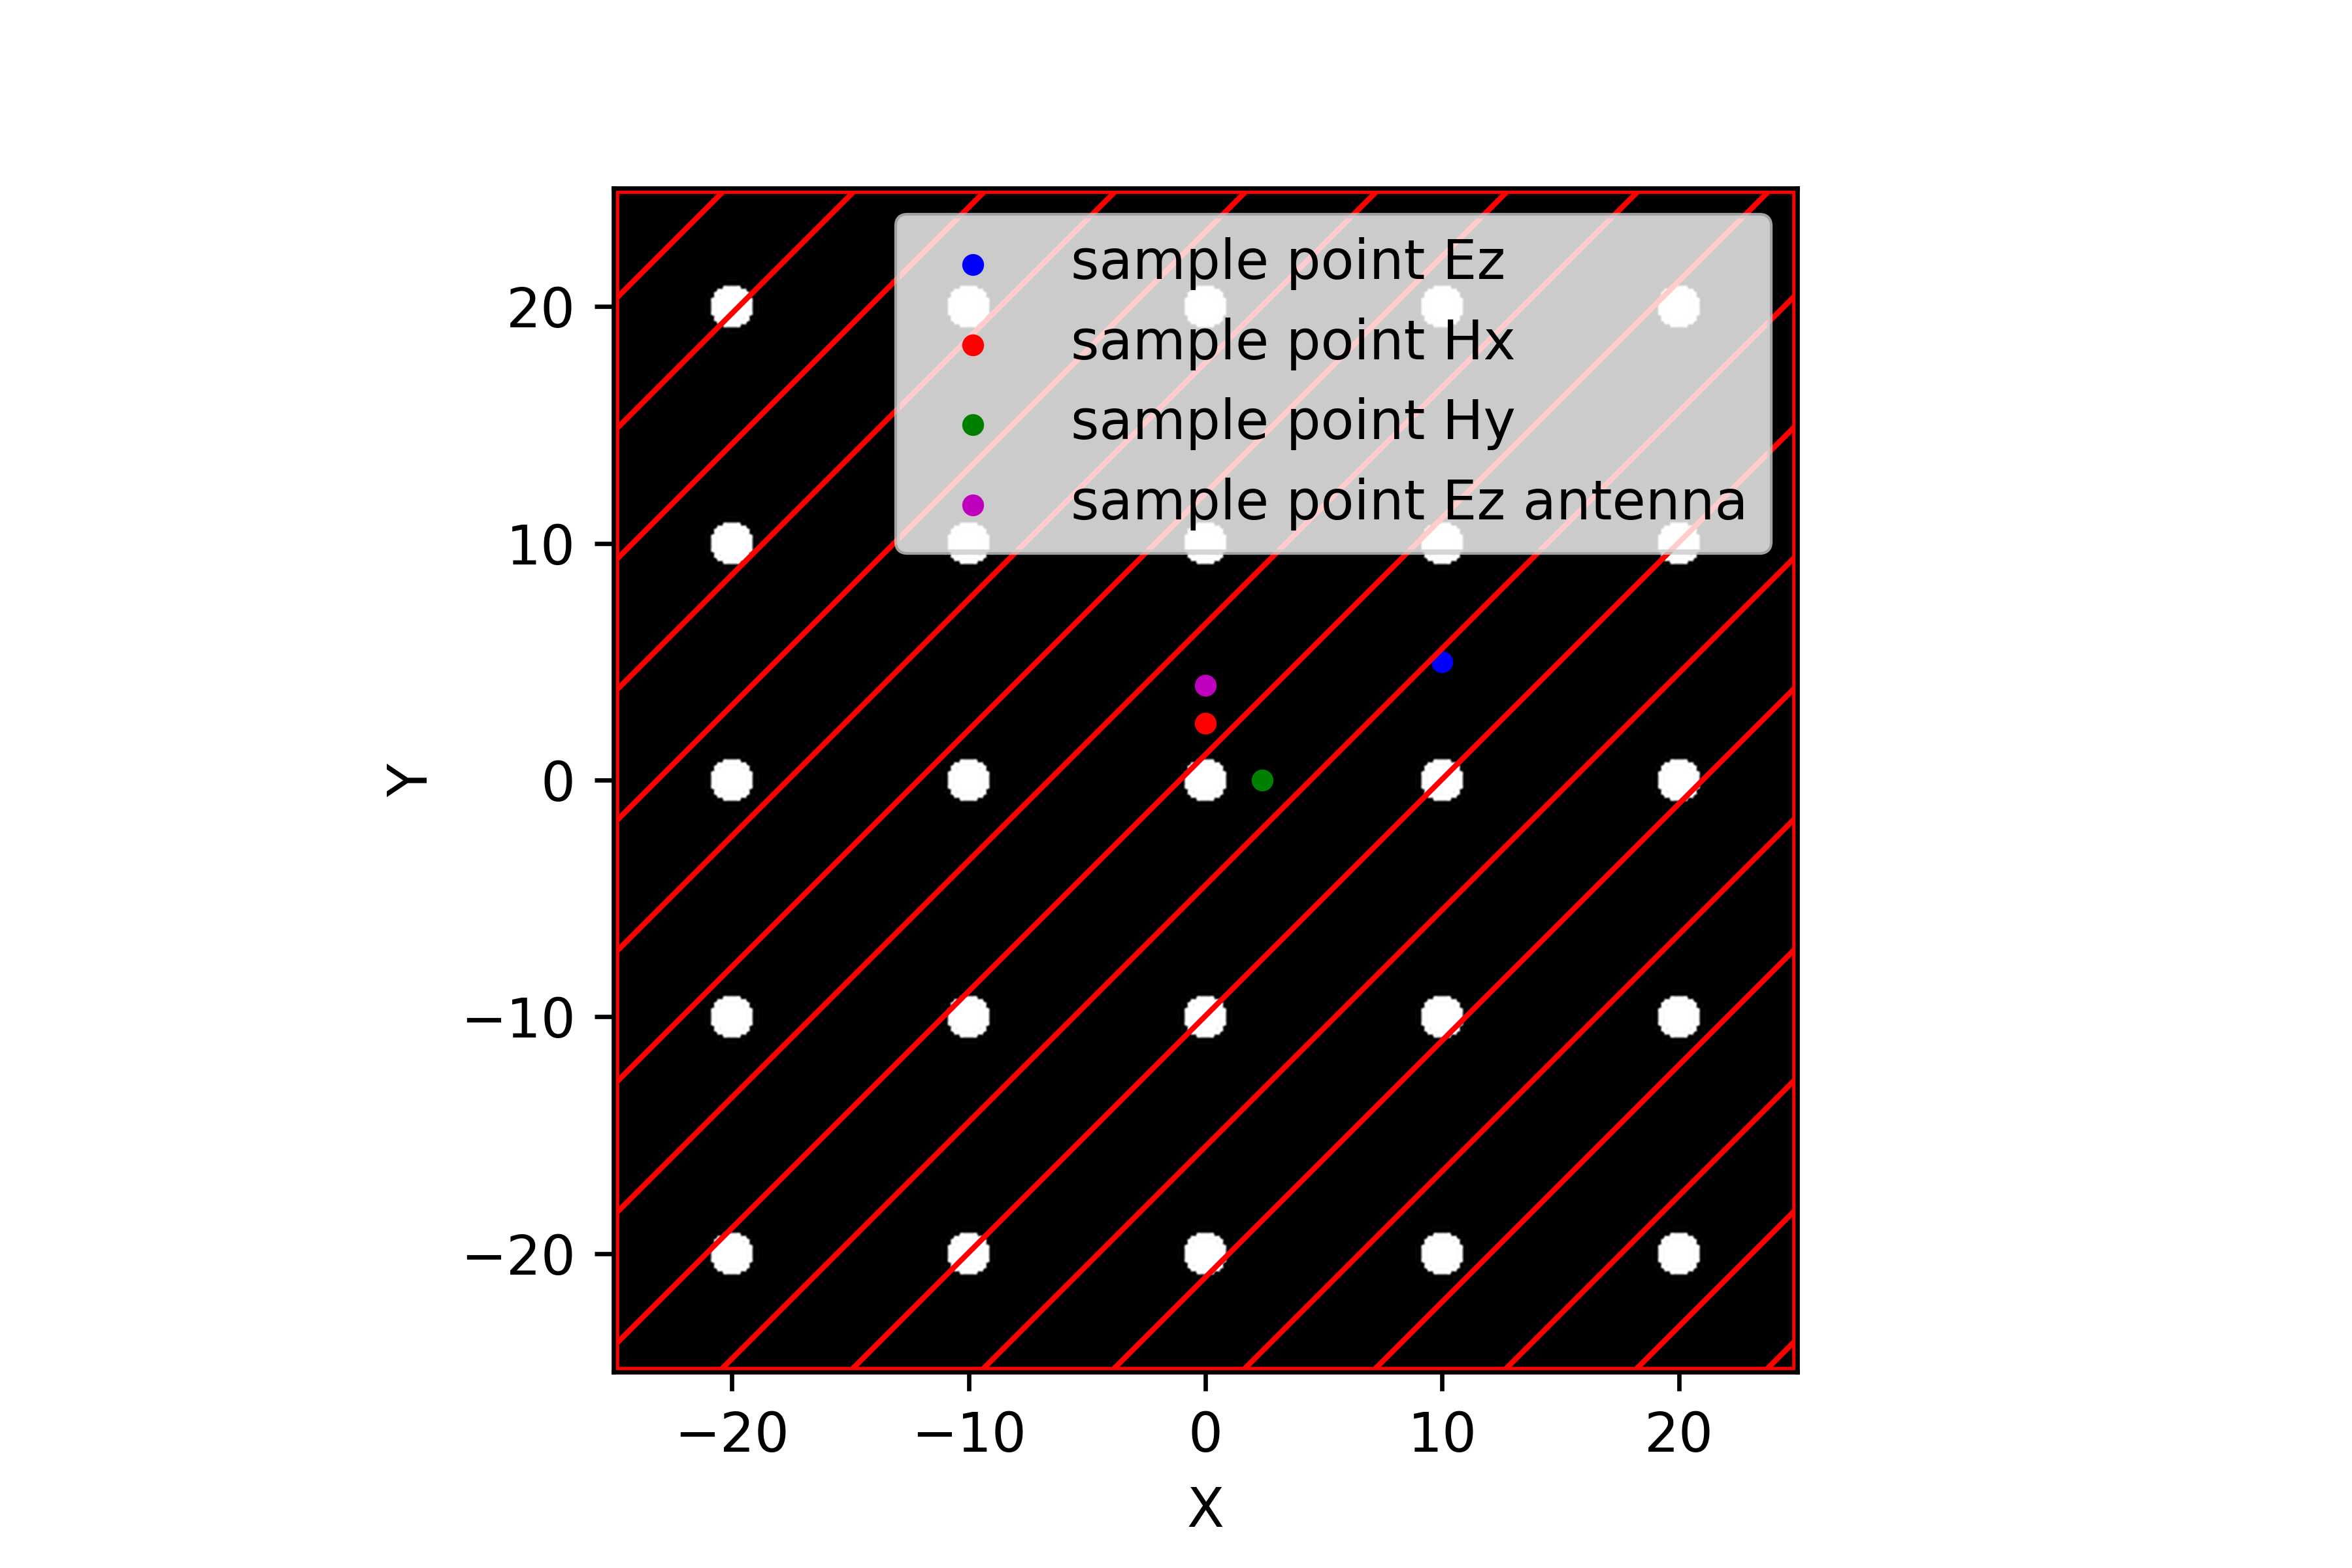

In [18]:
Image(filename=P["directory"]+"/mockup_plot.png", width=800) 

Except for the mockup_plot and the field slices from `P["get_field_slices"]`, the first part of an image name tells you where it came from. For example, if you haven't made any changes to the cells in this notebook you should find an image of Ez at its maximum amplitude. The image is named max_field_slice_Ez, so it comes from time stepping during `P["get_max_field_slice"]`.

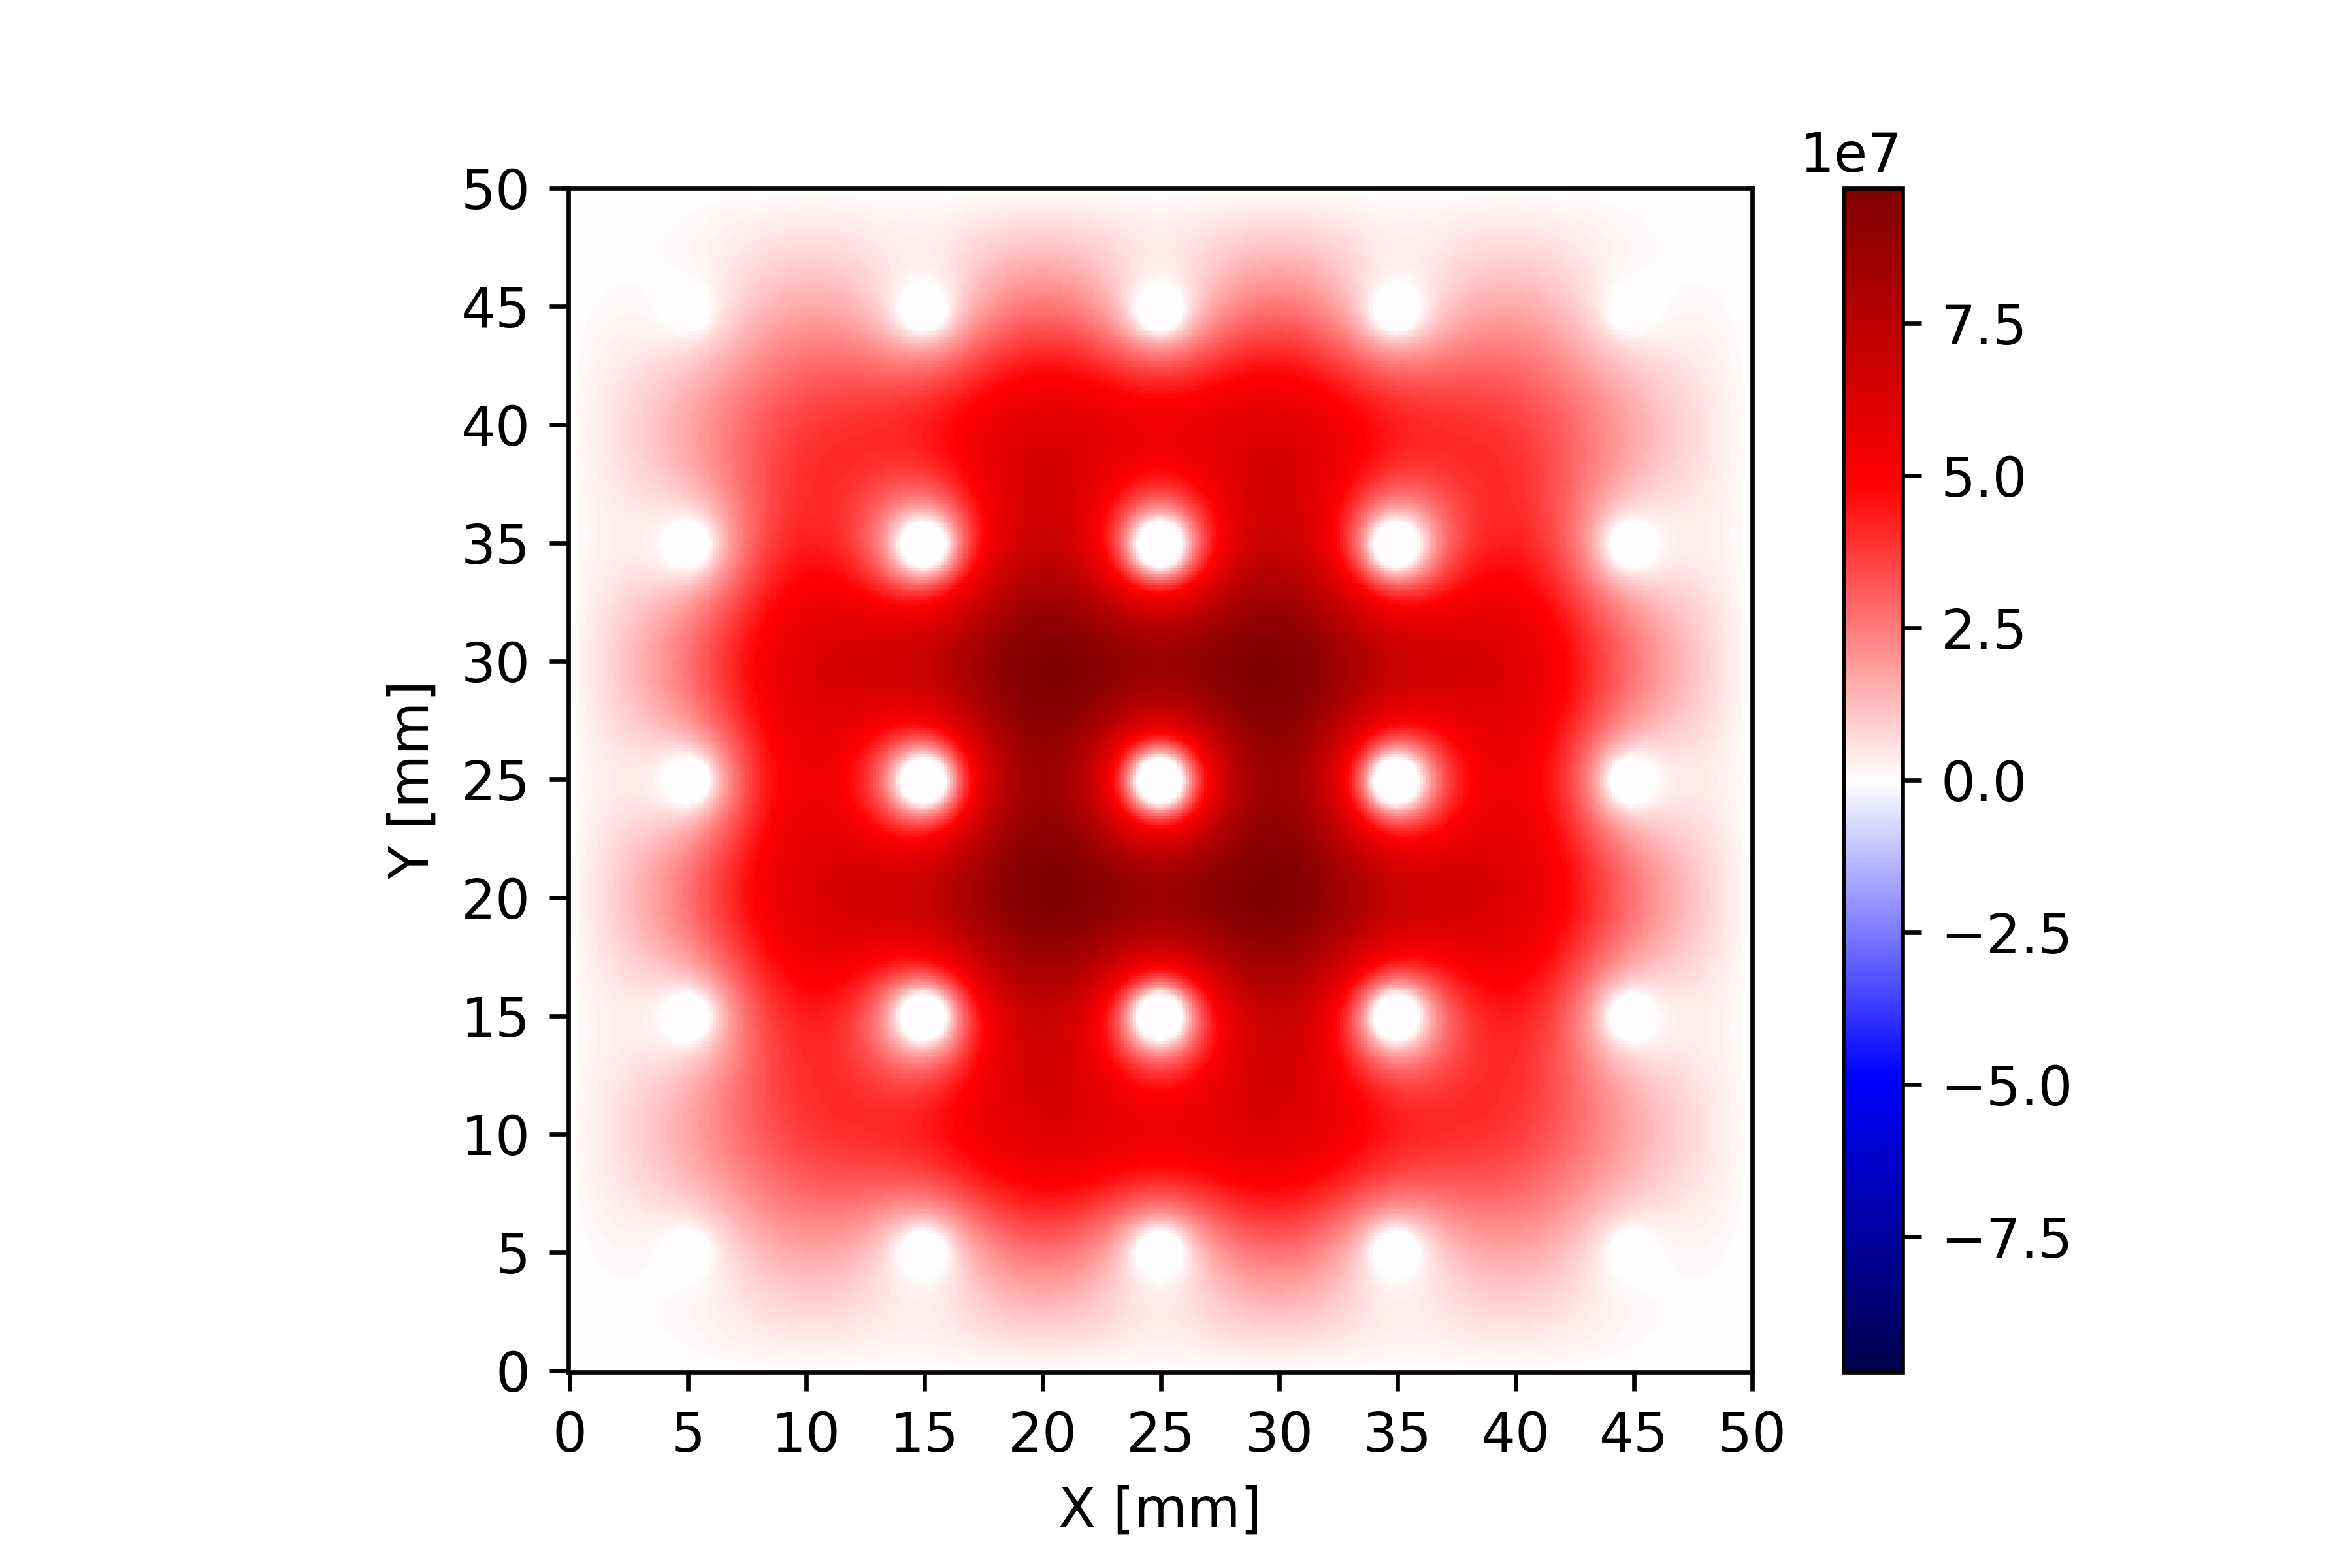

In [19]:
Image(filename= P["directory"]+"/max_field_slice_Ez.png", width=800)

If you haven't made any changes to the cells in the notebook, your P["directory"] should also contain:
 - The dictionary with most simulation output, it is called sim_output_set.
 - Real part of the resonant frequencies, in SI units. Only in csv format.
 - Four images from steady state fields (Ez, Hx, Hy, and runtime overlap) and a dictionary with the runtime overlap.
 - Five images from fields (rephased amplitude of Ez, Hx, and two error plots).
